In [18]:
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [19]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [20]:
import pandas as pd
dms=pd.get_dummies(df[["ind_109"]])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
y=df["90_target"]
X_=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [23]:
from sklearn.linear_model import LinearRegression
pca=PCA(18) 
X_reduced_train=pca.fit_transform(scale(X_train))
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [7]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([36.95, 49.21, 55.06, 59.53, 62.88, 65.77, 68.35, 70.38, 72.25,
       73.96, 75.56, 77.03, 78.41, 79.68, 80.9 , 82.07, 83.09, 84.01,
       84.86, 85.69, 86.49, 87.24, 87.91, 88.57, 89.18, 89.77, 90.31,
       90.8 , 91.27, 91.71, 92.13, 92.54, 92.92, 93.29, 93.64, 93.97,
       94.28, 94.58, 94.87, 95.15, 95.41, 95.65, 95.88, 96.11, 96.32,
       96.52, 96.71, 96.89, 97.05, 97.21, 97.36, 97.5 , 97.64, 97.77,
       97.9 , 98.02, 98.13, 98.23, 98.32, 98.41, 98.49, 98.57, 98.65,
       98.73, 98.8 , 98.87, 98.94, 99.  , 99.06, 99.12, 99.17, 99.22,
       99.27, 99.31, 99.35, 99.39, 99.43, 99.46, 99.49, 99.52, 99.55,
       99.58, 99.61, 99.64, 99.67, 99.69, 99.71, 99.73, 99.75, 99.77,
       99.79, 99.81, 99.82, 99.83, 99.84, 99.85, 99.86, 99.87, 99.88,
       99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

<BarContainer object of 133 artists>

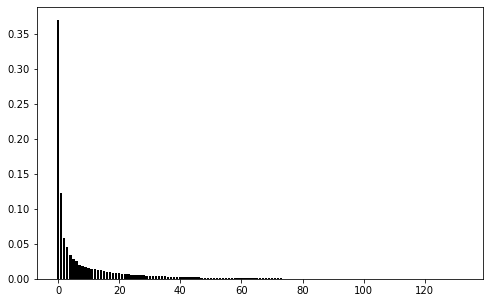

In [8]:
import matplotlib.pyplot as plt
features= range(pca.n_components_)
plt.figure(figsize=(8,5))
plt.bar(features,pca.explained_variance_ratio_,color="black")


In [39]:
from sklearn.linear_model import LinearRegression
pca=PCA() #5 component ile yap 
X_reduced_train=pca.fit_transform(scale(X_train))
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [40]:
y_pred=pcr_model.predict(X_reduced_train)
y_pred.shape

(3844,)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

32.366716188057204

In [42]:
mean_squared_error(y_train,y_pred)

1047.604316798244

In [43]:
df["90_target"].mean()

-4.115568369248927

In [44]:
r2_score(y_train,y_pred)

0.2174524810427796

Text(0, 0.5, 'PC2')

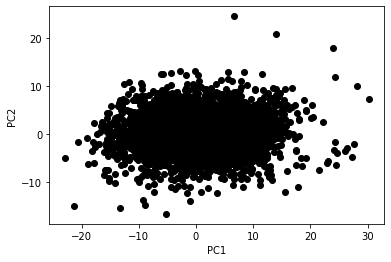

In [14]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0],PCA_components[1], color="black")
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

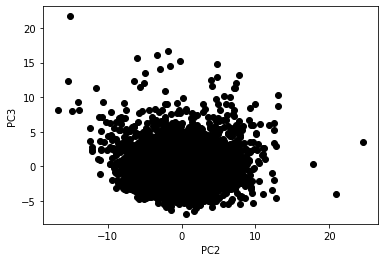

In [15]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[1],PCA_components[2], color="black")
plt.xlabel("PC2")
plt.ylabel("PC3")

Text(0, 0.5, 'PC4')

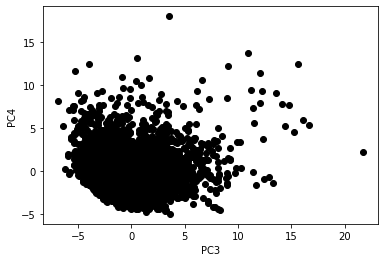

In [45]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[2],PCA_components[3], color="black")
plt.xlabel("PC3")
plt.ylabel("PC4")

Text(0, 0.5, 'PC5')

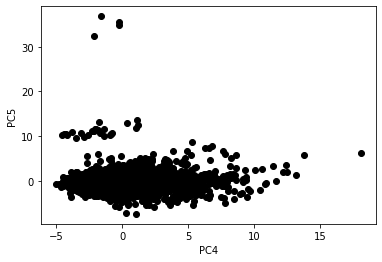

In [46]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[3],PCA_components[4], color="black")
plt.xlabel("PC4")
plt.ylabel("PC5")